In [1]:
!pip install sodapy

In [55]:
#NYC Inmate Death Data:

import pandas as pd
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us",
                 "Y4HZT9oYB9HgwoYrJfSANZYJB",
                 username="afran190@pratt.edu",
                 password="Zeusie1219055*")

results = client.get("f64t-5yiv", limit=1000)

results_df = pd.DataFrame.from_records(results)

In [57]:
results_df

,incident_id,reported_dt,incident_type,facility
0,64622,2015-01-01T17:20:00.000,Suicide,NaN
1,68923,2015-06-10T12:28:00.000,Suicide,NaN
2,77047,2016-01-29T14:20:00.000,Suicide,NaN
3,77355,2016-03-14T22:11:00.000,Suicide,NaN
4,90911,2017-04-16T14:06:00.000,Suicide,NaN
5,97125,2017-10-08T19:10:00.000,Suicide,RMSC
6,109391,2018-08-27T09:07:00.000,Suicide,AMKC
7,141237,2020-10-29T06:00:00.000,Suicide,AMKC
8,142321,2020-11-22T17:23:00.000,Suicide,MDC
9,144934,2021-01-22T19:52:00.000,Suicide,OBCC


In [23]:
results_df.to_csv('NYC_inmate_data_unclean.csv')

In [7]:
#Data Cleanup Open Refine:
#clean data in column "reported_dt to remove the time stamps
#to do this I did "edit column" "split into several columns" and set the seperating value to "T"
#then I deleted all the new sperated time stamp column

In [59]:
df_inmate = pd.read_csv('NYC_inmate_data_cleaned.csv')

df_inmate

,Column,incident_id,reported_dt,incident_type,facility
0,0,64622,1/1/15,Suicide,Unknown
1,1,68923,6/10/15,Suicide,Unknown
2,2,77047,1/29/16,Suicide,Unknown
3,3,77355,3/14/16,Suicide,Unknown
4,4,90911,4/16/17,Suicide,Unknown
5,5,97125,10/8/17,Suicide,RMSC
6,6,109391,8/27/18,Suicide,AMKC
7,7,141237,10/29/20,Suicide,AMKC
8,8,142321,11/22/20,Suicide,MDC
9,9,144934,1/22/21,Suicide,OBCC


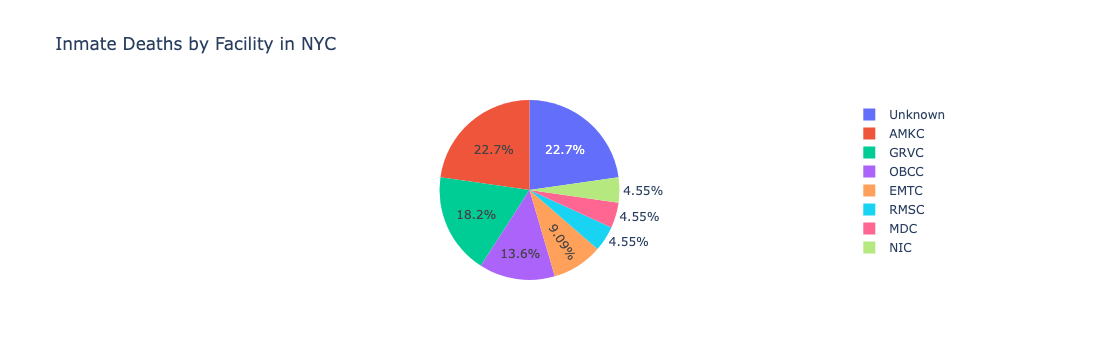

In [61]:
import plotly.express as px

facility_counts = df_inmate['facility'].value_counts().reset_index()
facility_counts.columns = ['facility', 'death_count']

# Create pie chart
fig = px.pie(
    facility_counts,
    names='facility',
    values='death_count',
    title='Inmate Deaths by Facility in NYC',
    color='facility'  # Automatically sets distinct colors
)

fig.show()

In [63]:
#NYC COVID-19 Mortality Data; 
import pandas as pd
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us",
                 "Y4HZT9oYB9HgwoYrJfSANZYJB",
                 username="afran190@pratt.edu",
                 password="Zeusie1219055*")

results_covid = client.get("rc75-m7u3", limit=2000)

results_df_covid = pd.DataFrame.from_records(results_covid)

In [65]:
results_df_covid

,date_of_interest,case_count,probable_case_count,hospitalized_count,death_count,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,bx_case_count,...,si_case_count,si_probable_case_count,si_hospitalized_count,si_death_count,si_probable_case_count_7day_avg,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,incomplete
0,2020-02-29T00:00:00.000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01T00:00:00.000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02T00:00:00.000,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03T00:00:00.000,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04T00:00:00.000,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,2025-05-01T00:00:00.000,142,124,26,2,165,282,29,2,25,...,13,16,2,0,10,10,19,3,0,61030
1889,2025-05-02T00:00:00.000,172,99,24,1,162,279,28,1,39,...,12,5,5,0,9,10,19,3,0,61030
1890,2025-05-03T00:00:00.000,101,65,13,1,159,272,27,1,18,...,12,5,2,0,9,11,19,3,0,61030
1891,2025-05-04T00:00:00.000,109,78,5,1,158,269,23,1,18,...,6,6,1,0,8,11,18,3,0,61030


In [47]:
results_df_covid.to_csv('NYC_covid_data_unclean.csv')

In [51]:
#Data Cleanup OpenRefine:
#cleaned dataset by removing all columns that did not relate to total case count and deaths 
#kept columns for case + death counts for each borough 
#data in column "date_of_interest" to remove the time stamps
#to do this I did "edit column" "split into several columns" and set the seperating value to "T"
#then I deleted all the new sperated time stamp column

In [67]:
df_covid = pd.read_csv('NYC_covid_data_clean.csv')

df_covid

,date_of_interest,total_case_count,total_death_count,bx_case_count,bx_death_count,bk_case_count,bk_death_count,mn_case_count,mn_death_count,qn_case_count,qn_death_count,si_case_count,si_death_count
0,2020-02-29,1,0,0,0,0,0,1,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,0,0,0,0,0,0,1,0,0,0
4,2020-03-04,5,0,0,0,1,0,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,2025-05-01,142,2,25,0,31,0,22,2,51,0,13,0
1889,2025-05-02,172,1,39,0,34,0,25,1,62,0,12,0
1890,2025-05-03,101,1,18,0,22,1,14,0,35,0,12,0
1891,2025-05-04,109,1,18,0,23,1,21,0,41,0,6,0


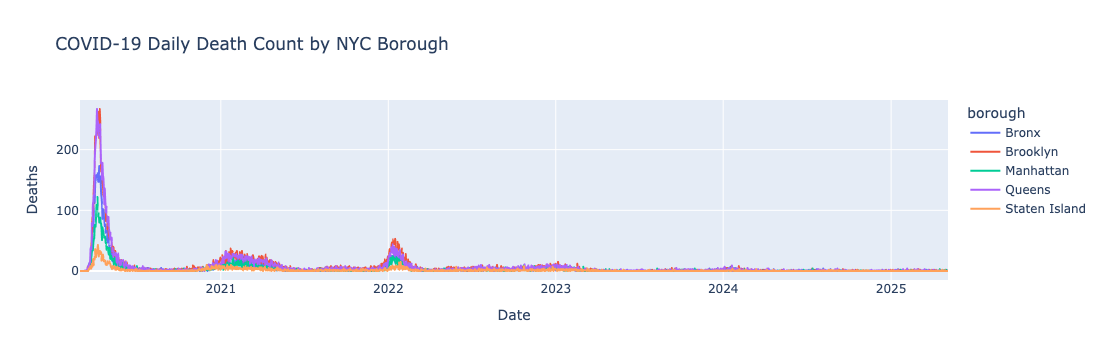

In [73]:
df_covid['date_of_interest'] = pd.to_datetime(df_covid['date_of_interest'])

# Selecting and renaming borough-specific death count columns
line_chart_df = df_covid[['date_of_interest', 'bx_death_count', 'bk_death_count', 
                    'mn_death_count', 'qn_death_count', 'si_death_count']].copy()

# Reshaping df to long format
melted_df = line_chart_df.melt(id_vars='date_of_interest',
                                var_name='borough',
                                value_name='death_count')

# changing short names to full borough names
borough_map = {
    'bx_death_count': 'Bronx',
    'bk_death_count': 'Brooklyn',
    'mn_death_count': 'Manhattan',
    'qn_death_count': 'Queens',
    'si_death_count': 'Staten Island'
}
melted_df['borough'] = melted_df['borough'].map(borough_map)

# Ploting the line chart
fig = px.line(melted_df, x='date_of_interest', y='death_count',
              color='borough',
              title='COVID-19 Daily Death Count by NYC Borough',
              labels={'date_of_interest': 'Date', 'death_count': 'Deaths'})

fig.show()

In [75]:
#NYC Drug-related Mortality Data:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us",
                 "Y4HZT9oYB9HgwoYrJfSANZYJB",
                 username="afran190@pratt.edu",
                 password="Zeusie1219055*")

results_drug = client.get("jb7j-dtam", limit=2000)


results_df_drug = pd.DataFrame.from_records(results_drug)

In [77]:
results_df_drug

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,90,8.6,7.1
1,2014,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1532,177.5,199.6
2,2014,All Other Causes,M,White Non-Hispanic,2275,169.4,141.3
3,2014,Cerebrovascular Disease (Stroke: I60-I69),F,Black Non-Hispanic,274,26.1,21.4
4,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1958,226.8,264.7
...,...,...,...,...,...,...,...
1089,2007,All Other Causes,M,Black Non-Hispanic,1163,136.5,162.4
1090,2007,Cerebrovascular Disease (Stroke: I60-I69),F,Other Race/ Ethnicity,.,.,.
1091,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Other Race/ Ethnicity,7,.,.
1092,2007,Septicemia (A40-A41),F,Hispanic,49,4.2,5.5


In [83]:
results_df_drug.to_csv('NYC_drug_data.csv')

In [85]:
#trying to find if there is any data for drug related deaths

results_df_drug.value_counts('leading_cause')

leading_cause
Malignant Neoplasms (Cancer: C00-C97)                                                                                                96
Influenza (Flu) and Pneumonia (J09-J18)                                                                                              96
All Other Causes                                                                                                                     96
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       96
Diabetes Mellitus (E10-E14)                                                                                                          92
Cerebrovascular Disease (Stroke: I60-I69)                                                                                            90
Chronic Lower Respiratory Diseases (J40-J47)                                                                                         88
Accidents Except Drug Posioning (V

/var/folders/dv/ftcft6k953x5nbfz29z5p5880000gp/T/ipykernel_70940/3927523833.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



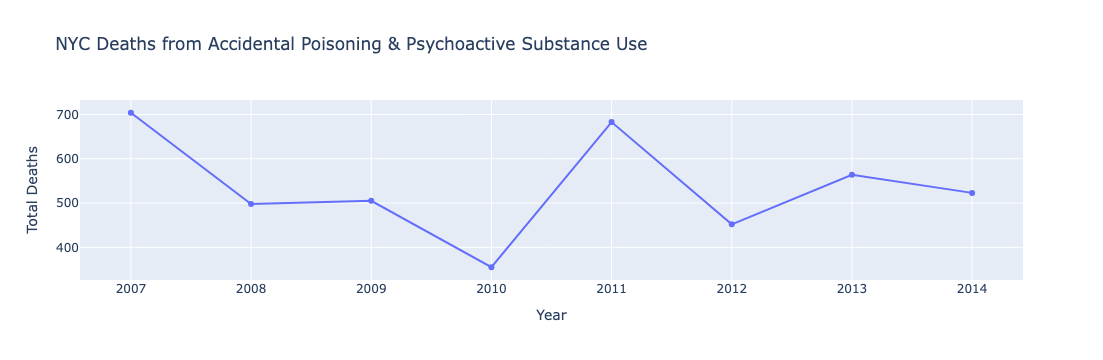

In [87]:
#Now finding that 39 deaths have been related to drug overdose; will begin to plot

import plotly.express as px

# Step 1: Filter for the specific cause
target_cause = "Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)"
filtered_df = results_df_drug[results_df_drug['leading_cause'] == target_cause]

# Step 2: Make sure 'deaths' column is numeric
filtered_df['deaths'] = pd.to_numeric(filtered_df['deaths'], errors='coerce')

# Step 3: Group by year and sum deaths
yearly_deaths = filtered_df.groupby('year')['deaths'].sum().reset_index()

# Step 4: Plot the results
fig = px.line(yearly_deaths, x='year', y='deaths',
              title='NYC Deaths from Accidental Poisoning & Psychoactive Substance Use',
              labels={'year': 'Year', 'deaths': 'Total Deaths'},
              markers=True)

fig.show()